In [1]:
import numpy as np
import math

a = np.array([[0,1,2],[3,4,5],[6,7,8]])

print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [2]:
print(a[0])

[0 1 2]


In [3]:
points = np.array([[0,0,0],[0,3,0],[0,6,0],[1.5,0,-3],[1.5,0,3],[-3,0,2]])
vectors = np.array([(points[1]-points[0]),(points[2]-points[0]),(points[3]-points[1]),(points[4]-points[1]),(points[5]-points[2])])
print("Vectors =\n",vectors)

def vecNorm(x):
    y = [0]*len(x)
    for i in range(len(x)):
        y[i] = np.linalg.norm(x[i])
    return y

normals = vecNorm(vectors)
print("Normals =",normals)

def vecUnits(x):
    y = x.copy()
    for i in range(len(x)):
        y[i] = x[i]/np.linalg.norm(x[i])
    #y = x/np.linalg.norm(x, axis = 1)
    return y

units = vecUnits(vectors)
print("Unit Vectors =\n",units)

Vectors =
 [[ 0.   3.   0. ]
 [ 0.   6.   0. ]
 [ 1.5 -3.  -3. ]
 [ 1.5 -3.   3. ]
 [-3.  -6.   2. ]]
Normals = [3.0, 6.0, 4.5, 4.5, 7.0]
Unit Vectors =
 [[ 0.          1.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.33333333 -0.66666667 -0.66666667]
 [ 0.33333333 -0.66666667  0.66666667]
 [-0.42857143 -0.85714286  0.28571429]]


In [4]:
BD = np.cross(vectors[0],units[2])
BE = np.cross(vectors[0],units[3])
CF = np.cross(vectors[1],units[4])

print(BD)
print(BE)
print(CF)

[-2.  0. -1.]
[ 2.  0. -1.]
[ 1.71428571 -0.          2.57142857]


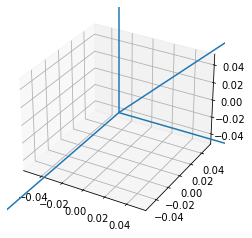

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()

d3 = fig.gca(projection='3d')

x, y, z = np.array([0,0,0])
u, v, w = np.array([1,0,0])

d3.quiver(x,y,z,u,v,w,length=1)


u, v, w = np.array([0,-1,0])

d3.quiver(x,y,z,u,v,w,length=1)

u, v, w = np.array([0,0,1])

d3.quiver(x,y,z,u,v,w,length=1)


u, v, w = np.array([1,1,1])

d3.quiver(x,y,z,u,v,w,length=1)

plt.show()

# tutorial start

# Determining Static Equilibrium in NumPY

What you'll do:
    In this tutorial, we will use NumPy to create vectors and moments using NumPy arrays
    
What you'll learn:
    -How to represent points, vectors, and moments in NumPy.
    -How to find the normal of vectors
    
What you'll need:
    -NumPy
    -matplotlib

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In this tutorial we will use the following NumPy tools:
    -np.linalg.norm : this function determines the normal of a vector
    -np.cross : this function takes two matrices and produces the cross product
    -plt.figure : this function produces a 3D rendering of vectors

# Solving equilibrium as a sum of forces

Your model consists of a beam under a sum of forces and moments that both sum to zero.
Example force = <x,y,z>
Example Moment = d*<x,y,z>
where x, y, and z represent the magnitude of the force being applied in the corresponding direction and d is the position the force is applied to the beam.

Lets start with some simple examples of force vectors

In [25]:
forceA = np.array([1,0,0])
forceB = np.array([0,1,0])
print(forceA)
print(forceB)

[1 0 0]
[0 1 0]


This defines force A as being a vector with magnitude of 1 in the x direction and force B as magnitude 1 in the y direction.

Lets use matplotlib to visualize these forces.

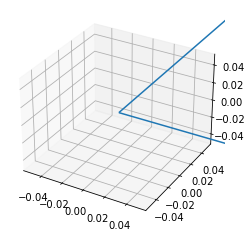

In [58]:
fig = plt.figure()

d3 = fig.gca(projection='3d')

x, y, z = np.array([0,0,0]) # defining the point off application.  Let's make it the origin

u, v, w = forceA # breaking the force vector into individual components
d3.quiver(x,y,z,u,v,w) # plotting forceA

u, v, w = forceB
d3.quiver(x,y,z,u,v,w)

plt.show()

As you can see, there are two forces eminating from a single point.
In order to simplify this problem, we can add them together to find the sum of forces.

In [26]:
forceC = forceA + forceB
print(forceC)

[1 1 0]


Force C now acts as a single force that represents both A and B.
Let's plot it to see the result.

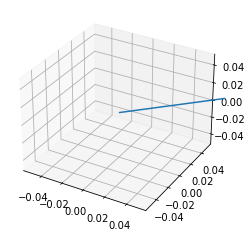

In [30]:
fig = plt.figure()

d3 = fig.gca(projection='3d')

x, y, z = np.array([0,0,0])

u, v, w = forceC
d3.quiver(x,y,z,u,v,w)

plt.show()

There is now a single vector at the origin.
However, our goal is equilibrium.
This means that we want our sum of forces to be <0,0,0>, or else our object will experience acceleration
Therefore, there needs to be another force that counteracts the prior ones.

We can write this problem as A+B+R=0,
with R being the reaction force that solves the problem.

In our example this would mean:
<1,0,0>+<0,1,0>+<x,y,z>=<0,0,0>

Broken into x, y, and z components this gives us:
1+0+x=0
0+1+y=0
0+0+z=0

solving for x, y, and z of R gives us a vector of <-1,-1,0>.

Let's plot this and see if it works.

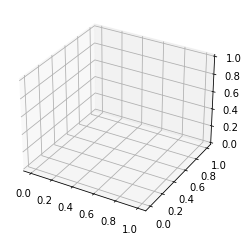

In [31]:
R = np.array([-1,-1,0])

fig = plt.figure()

d3 = fig.gca(projection='3d')

x, y, z = np.array([0,0,0])

u, v, w = forceA + forceB + R # add them all together for sum of forces
d3.quiver(x,y,z,u,v,w)

plt.show()

As evidenced by the empty graph, there is indeed no outlying forces,
making the system experience equilibrium.


# Solving Equilibrium as a sum of moments

Next let's move to a more complicated application.
When forces are not all applied at the same point moments are created.
Similar to forces, these moments must all sum to zero, otherwise rotationial acceleration will be experienced.

A simple example of this would be from a force applied to a stationary pole secured in the ground.
The pole does not move, so it must apply a reaction force.
The pole also does not rotate, so it must also be creating a reaction moment.
Let's solve for both.

Lets say a 5N force is applied 2m above the base of the pole.

In [34]:
f = 5
L = 2

R = 0 - f
M = 0 - f*L
print(R)
print(M)

-5
-10


# Finding values with physical properties

Let's say that instead of a force acting perpendicularly to the beam, a force was applied to our pole through a wire that was also attached to the ground.
Given the tension in this cord, all we need to solve this problem are the physical locations of these objects.

Let's denote the base of the pole as the origin.
Now, lets say the cord is attached to the ground 3m in the x direction and attached to the pole 2m up, in the z direction.

We can define these points in space as numpy arrays, and then use those arrays to find directional vectors.

In [57]:
poleBase = np.array([0,0,0])
cordBase = np.array([3,0,0])
cordConnection = np.array([0,0,2])

poleDirection = cordConnection - poleBase
print(poleDirection)
cordDirection = cordBase - cordConnection
print(cordDirection)

[0 0 2]
[ 3  0 -2]


In order to use these vectors in relation to forces we need to convert them into unit vectors.
Unit vectors have a magnitude of one, and convey only the direction of the forces.

In [52]:
cordUnit = cordDirection/np.linalg.norm(cordDirection)
print(cordUnit)

[ 0.83205029  0.         -0.5547002 ]


We can then multiply this direction with the magnitude of the force in order to find the force vector.

Let's say the cord has a tension of 5N

In [53]:
cordTension = 5
forceCord = cordUnit * cordTension
print(forceCord)

[ 4.16025147  0.         -2.77350098]


In order to find the moment we need the cross product of the force vector and the radius.

In [54]:
momentCord = np.cross(forceCord, poleDirection)
print(momentCord)

[ 0.         -8.32050294  0.        ]


Now all we need to do is find the reaction force and moment.

In [55]:
equilibrium = np.array([0,0,0])
R = equilibrium - forceCord
M = equilibrium - momentCord
print("Reaction force =",R)
print("Reaction moment =",M)

Reaction force = [-4.16025147  0.          2.77350098]
Reaction moment = [0.         8.32050294 0.        ]
